## Observations and Insights 

###It's noteworthy that Capomulin and Ramicane have very similiar measures of central tendency. The observation that the both the middle elements and average sum in their tumor volume data sets are almost equal and the lowest of all the treatments shows promise for these two drug regimens. Both drugs also had the lowest data spread.
###The pie chart visualizes almost an equal amount of male mouse vs female mouse so this should be a good sample of how the drug will affect all mice.
###I chose r944 after sorting the data for the heaviest mouse in the Capomulin data set. Interestingly, although one of the heaviest in the Capomulin trial the line plot visualized he had a reduction in tumor size at the end of the 45 day treatment period.
###Using a subset of the data, the Capomulin data set a scatter plot showed that overall weight affects tumor growth. The bigger the mouse the greater the average tumor size with the exception of an outlier.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
complete_data_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
complete_data_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
total_mice = complete_data_results["Mouse ID"].value_counts()
total_mice

g989    13
b559    10
z795    10
a444    10
c832    10
        ..
l872     1
n482     1
h428     1
x336     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
#Determine amount of individual time points
individual_mice = len(complete_data_results["Timepoint"].unique())
individual_mice

10

In [7]:
#Determine amount of ind tumor volume values
individual_mice = len(complete_data_results["Tumor Volume (mm3)"].unique())
individual_mice

1644

In [8]:
individual_mice = len(complete_data_results["Mouse ID"].unique())
individual_mice                      

249

In [9]:
# # Getting the duplicate mouse using loc and "duplicated" from the pd help docs 

In [10]:
duplicate_mouse = complete_data_results.loc[complete_data_results.duplicated(subset=["Mouse ID","Timepoint"]) == True]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
#State name of duplicate mouse
print(f"The duplicate mouse is g989")

The duplicate mouse is g989


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
print(f"The duplicate mouse is a female, she is 21 months old, weighs 26 lbs, and her tumor volume increased over the course of treatment.")


The duplicate mouse is a female, she is 21 months old, weighs 26 lbs, and her tumor volume increased over the course of treatment.


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# duplicate_mouse.dropna(inplace = True)
# duplicate_mouse
complete_data_results.dropna(inplace = False)
complete_data_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
total_no_duplicates = complete_data_results.loc[complete_data_results.duplicated(subset=["Mouse ID", "Timepoint"]) == False]
total_no_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
total_no_duplicates = complete_data_results.loc[complete_data_results.duplicated(subset=["Mouse ID", "Timepoint"]) == False]
total_no_duplicates.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1884,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1885,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1886,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
total_no_duplicates.groupby(["Mouse ID", "Timepoint"])

In [17]:
complete_data_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [18]:
total_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [19]:
clean_data = complete_data_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
clean_data.groupby(["Mouse ID"])


## Summary Statistics

In [21]:
# Look at data before generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [22]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Calculate measures of central tendency: in office hours instructor suggested using aggregate with a similiar example
summary_statistics_clean_data = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_statistics_clean_data


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [25]:
#create a list to view all methods of treatment
regimen_statistics = clean_data["Drug Regimen"].unique()
regimen_statistics

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [26]:
#data set
total_mice_regimen = len(clean_data["Mouse ID"].unique())
total_mice_regimen


249

In [27]:
total_mice_per_regimen = clean_data.set_index(["Drug Regimen"])["Mouse ID"]
total_mice_per_regimen


Drug Regimen
Ramicane    k403
Ramicane    k403
Ramicane    k403
Ramicane    k403
Ramicane    k403
            ... 
Naftisol    z969
Naftisol    z969
Naftisol    z969
Naftisol    z969
Naftisol    z969
Name: Mouse ID, Length: 1888, dtype: object

In [28]:
clean_data["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [29]:
#data set
Drug = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]

Mice = [156, 178, 178, 181, 181, 182, 186, 188, 228, 230]


In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

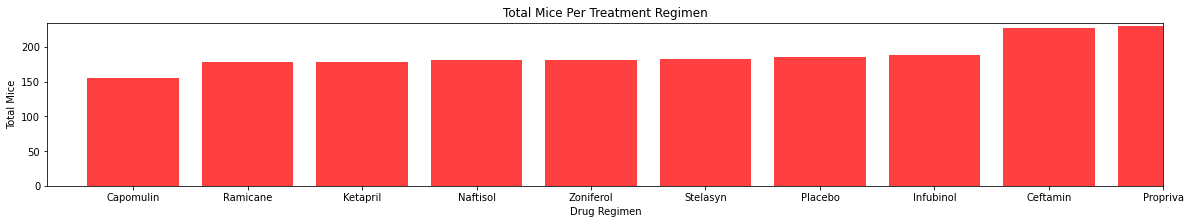

In [31]:
x_axis = np.arange(0, len(Drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(20,3))    
plt.title("Total Mice Per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")

plt.xlim(-.75, len(Drug)-2.25)
plt.ylim(0, max(Mice) + 5)


plt.bar(x_axis, Mice, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, Drug)

plt.show()

In [32]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#data set 2 ensure there are no outliers
clean_data["Sex"].unique()


array(['Male', 'Female'], dtype=object)

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_data["Sex"].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

In [35]:
Sex = ["Male", "Female"]
Mice = ["958", "930"]
colors = ["lightskyblue", "lightcoral"]

<function matplotlib.pyplot.show(*args, **kw)>

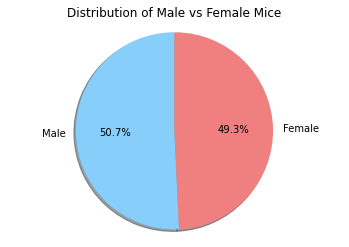

In [36]:
plt.title("Distribution of Male vs Female Mice")
plt.pie(Mice, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [38]:
#Examine data again 
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
#To get final tumor vol must capture last time point (where final tumor vol would be recorded not the greatest tumor volume because the tumor may have gone down during the treatment days)
#Group clean data by mouse id and time point and get the last time point
final_tumor_vol = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
final_tumor_vol

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [40]:
final_tumor_vol.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [41]:
final_tumor_vol = final_tumor_vol.reset_index()

In [42]:
#merge clean data with new data based on final volume
compare_top_regimens = pd.merge(clean_data, final_tumor_vol, how="left", on=["Mouse ID", "Timepoint"])
compare_top_regimens

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
#Didn't get the result I was seeking so do another merge swapping df so that last timepoint/volume recording is beside mouse id and data is grouped by last time point recording of last volume per mouse for better visibility and cleaner data
compare_top_regimens = pd.merge(final_tumor_vol, clean_data, how="left", on=["Mouse ID", "Timepoint"])
compare_top_regimens

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [44]:
#Put treatments into a list for for loop (and later for plot labels)
compare_top_regimens["Drug Regimen"].unique()

array(['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin'],
      dtype=object)

In [45]:
top_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [46]:
#Determine if top four treatments have equal amount of mice in trial
compare_top_regimens["Drug Regimen"].value_counts()

Naftisol     25
Propriva     25
Zoniferol    25
Ketapril     25
Placebo      25
Capomulin    25
Ramicane     25
Infubinol    25
Ceftamin     25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [47]:
# #final_tumor_vol = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
# quan_compare_top_regimens = compare_top_regimens.groupby(["Drug Regimen"])["Timepoint"]
# quan_compare_top_regimens


In [48]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


In [49]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [51]:
#Refresh memory of data

In [52]:
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
#Sort data to drug of promise - Capomulin
dissect_capo = clean_data[(clean_data["Drug Regimen"] == "Capomulin")]
dissect_capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [54]:
#Seeking heaviest mouse treated with Capomulin
fattest_capo = dissect_capo.sort_values(["Weight (g)"], ascending = False)
fattest_capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1455,r157,Capomulin,Male,22,25,15,46.539206,0
390,r944,Capomulin,Male,12,25,45,41.581521,2
381,r944,Capomulin,Male,12,25,0,45.000000,0
382,r944,Capomulin,Male,12,25,5,45.737145,0
383,r944,Capomulin,Male,12,25,10,46.544292,0
...,...,...,...,...,...,...,...,...
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [55]:
#Select a mouse
print(f"The mouse selected for analyzation is r944")

The mouse selected for analyzation is r944


In [56]:
#View all data on selected mouse
dissect_capo_final = clean_data[(clean_data["Mouse ID"] == "r944")]
dissect_capo_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
381,r944,Capomulin,Male,12,25,0,45.000000,0
382,r944,Capomulin,Male,12,25,5,45.737145,0
383,r944,Capomulin,Male,12,25,10,46.544292,0
384,r944,Capomulin,Male,12,25,15,47.373423,0
385,r944,Capomulin,Male,12,25,20,43.225671,1
386,r944,Capomulin,Male,12,25,25,41.086991,1
387,r944,Capomulin,Male,12,25,30,41.680791,1
388,r944,Capomulin,Male,12,25,35,40.401765,2
389,r944,Capomulin,Male,12,25,40,41.042045,2
390,r944,Capomulin,Male,12,25,45,41.581521,2


In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Set x axis to numerical values for timepoints
x_axis_data = np.arange(0,50,5)
x_axis_data

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [58]:
#Tumor Volume's
tumor_volume = [45.0, 45.7, 46.5, 47.4, 43.2, 41.1, 41.7, 40.4, 41.0, 41.6]

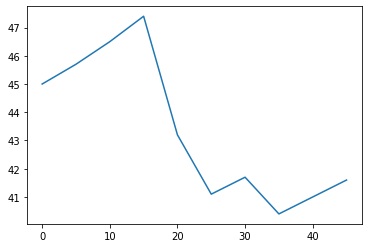

In [59]:
#plot the line
plt.plot(x_axis_data, tumor_volume)
plt.show()

In [60]:
#View capomulin data
dissect_capo


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [61]:
#Create a dataframe for mouse weight vs avg tumor volume in Capomulin regimen
capo_mouse_wgt_vs_tumor =  dissect_capo.groupby(["Mouse ID", "Weight (g)"]).mean()["Tumor Volume (mm3)"]
capo_mouse_wgt_vs_tumor

Mouse ID  Weight (g)
b128      22            41.963636
b742      21            40.083699
f966      17            36.505973
g288      19            41.990097
g316      22            44.613344
i557      24            44.805810
i738      20            39.141053
j119      23            44.465236
j246      21            43.216925
l509      21            44.434474
l897      19            42.507261
m601      17            34.847470
m957      19            39.049816
r157      25            45.798970
r554      17            36.509212
r944      25            43.367364
s185      17            34.559143
s710      23            42.803733
t565      17            39.328725
u364      17            39.887495
v923      21            41.581595
w150      23            41.384825
w914      21            41.352452
x401      15            36.182040
y793      17            38.506829
Name: Tumor Volume (mm3), dtype: float64

In [62]:
#Determine how many results are in dataset
len(capo_mouse_wgt_vs_tumor)

25

In [63]:
#Sort in ascending order to make plotting easier to visualize
capo_mouse_wgt_vs_tumor.sort_values(ascending = True) 

Mouse ID  Weight (g)
s185      17            34.559143
m601      17            34.847470
x401      15            36.182040
f966      17            36.505973
r554      17            36.509212
y793      17            38.506829
m957      19            39.049816
i738      20            39.141053
t565      17            39.328725
u364      17            39.887495
b742      21            40.083699
w914      21            41.352452
w150      23            41.384825
v923      21            41.581595
b128      22            41.963636
g288      19            41.990097
l897      19            42.507261
s710      23            42.803733
j246      21            43.216925
r944      25            43.367364
l509      21            44.434474
j119      23            44.465236
g316      22            44.613344
i557      24            44.805810
r157      25            45.798970
Name: Tumor Volume (mm3), dtype: float64

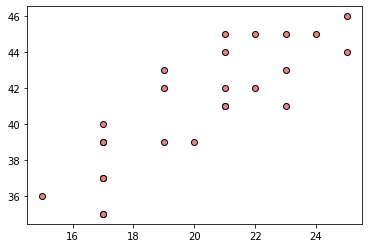

In [64]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = [17, 17, 15, 17, 17, 17, 19, 20, 17, 17, 21, 21, 23, 21, 22, 19, 19, 23, 21, 25, 21, 23, 22, 24, 25]
average_tumor_vol =  [35, 35, 36, 37, 37, 39, 39, 39, 39, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44, 44, 45, 45 ,45, 45, 46]
 
plt.scatter(weight, average_tumor_vol, marker="o", facecolors="lightcoral", edgecolors="black")  


## Correlation and Regression

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
